# Atf3 FACS Results

In [4]:
# Load necessary libraries
suppressPackageStartupMessages({
library(ggplot2)
library(dplyr)
library(reshape2)
library(lme4)
library(lmerTest)
library(tidyr)
library(ggsignif)
})

In [1]:
load(file = '../step8_Flow_Cytometry/results/Atf3/rdata.rdata')

In [2]:
ls()

[1] "annotations_df"              "data"                       
 [3] "data_Atf3_control"           "data_Atf3_control_hr"       
 [5] "data_hr"                     "data_melted_mixed"          
 [7] "data0"                       "data1"                      
 [9] "data2"                       "filtered_data"              
[11] "human_readable_names"        "humanreadble"               
[13] "measurement"                 "measurement_cols"           
[15] "mixed_effects_results"       "mixed_effects_results_mixed"
[17] "plot"                        "plot1"                      
[19] "r3dcol"                      "replace_with_human_readable"
[21] "result"                      "run_mixed_effects"          
[23] "selected_samples"            "significance_threshold"     
[25] "significant_mixed_effects"   "singular_fit_measurements"

Warning message:
“Removed 83 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 83 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 83 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_text()`).”


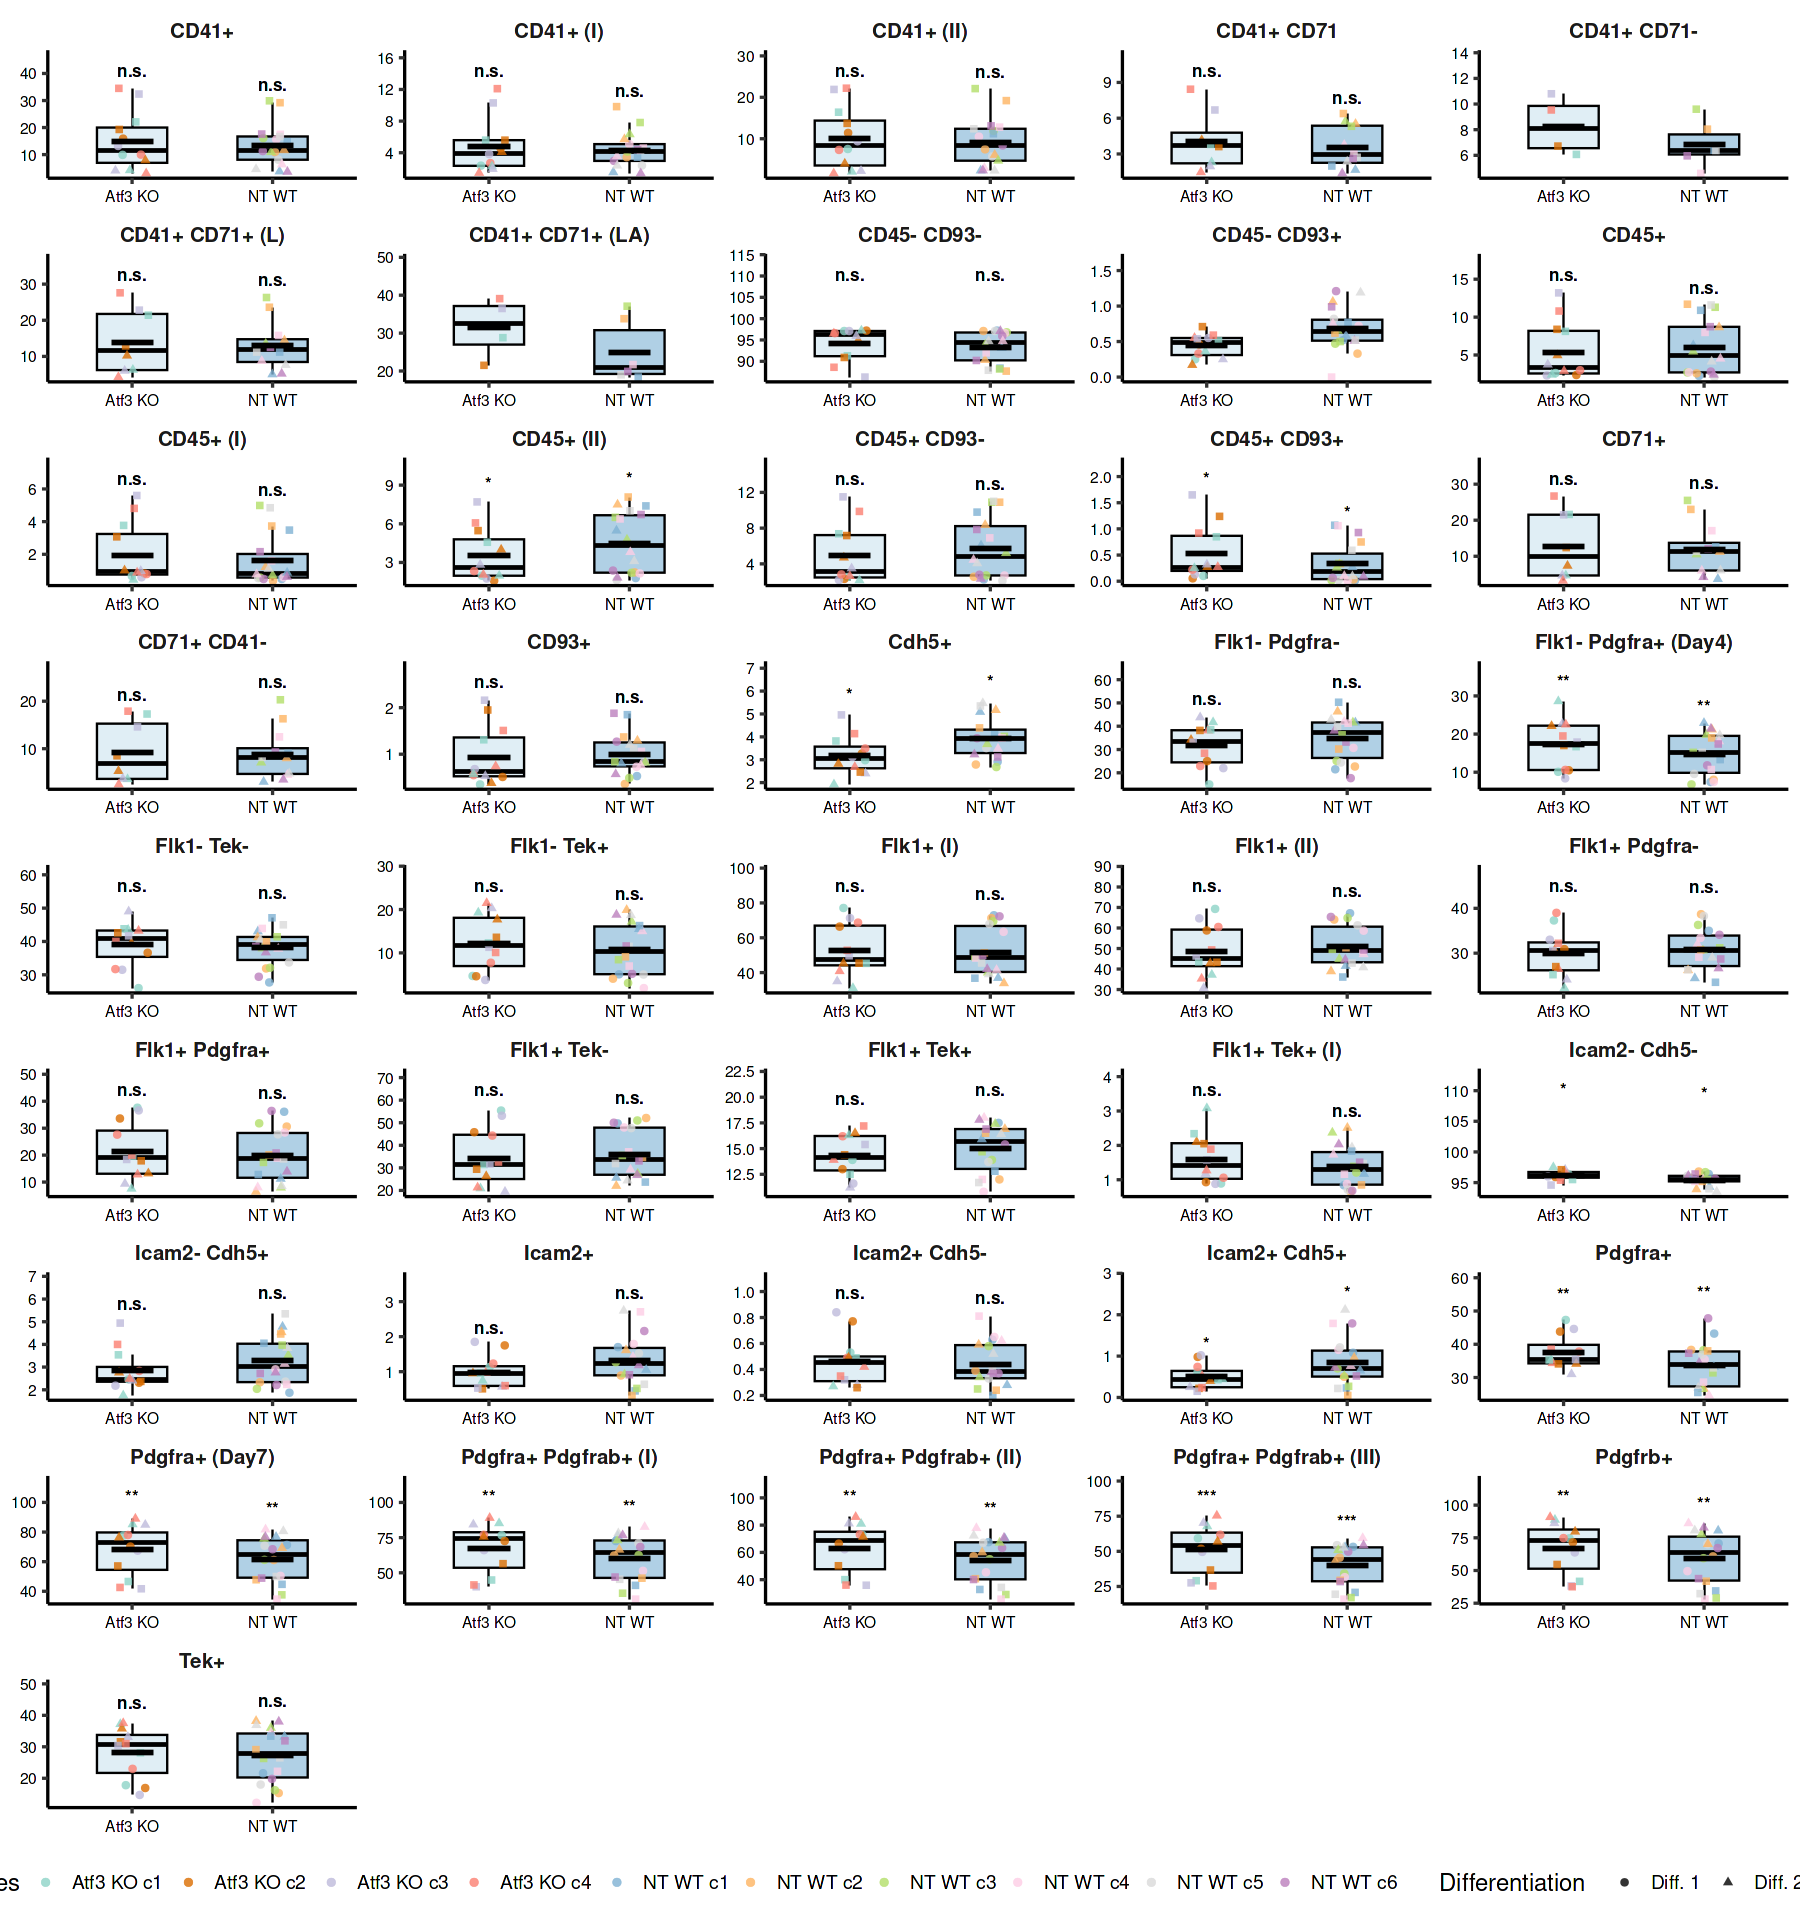

In [23]:
library(ggplot2)
library(dplyr)

options(repr.plot.width = 15, repr.plot.height = 16)

plot <- ggplot(data_melted_mixed, aes(x = Conditions, y = Value)) +
  geom_boxplot(aes(fill = Conditions), color = "black", alpha = 0.35, width = 0.5, linewidth = 0.5, outlier.shape = NA) +
  geom_jitter(aes(color = Samples3, shape = DifferentiationC), size = 2, width = 0.12, alpha = 0.8, stroke = 0.2) +
  stat_summary(fun = mean, geom = "crossbar", width = 0.3, color = "black", linewidth = 0.4, fatten = 3) +
  geom_text(
    data = annotations_df,
    aes(x = Conditions, y = y_position, label = Significance),
    fontface = "bold",
    vjust = 0, hjust = 0.5,
    size = 3.5,
    color = "black",
    inherit.aes = FALSE
  ) +
  scale_fill_manual(values = c("#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C", "#FB9A99", "#E31A1C", "#FDBF6F", "#FF7F00")) +
  scale_color_manual(values = r3dcol$l10z) +
  facet_wrap(~ Measurement_hr, scales = "free", ncol = 5) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.28))) + # Add more top space!
  labs(
    title = NULL, y = NULL, x = NULL
  ) +
  theme_classic(base_size = 14) +
  theme(
    strip.text = element_text(size = 12, face = "bold"),
    axis.line = element_line(size = 0.7),
    axis.ticks = element_line(size = 0.7),
    axis.text = element_text(size = 10, color = "black"),
    axis.text.x = element_text(angle = 0, vjust = 0.5, size = 9),
    axis.text.y = element_text(size = 9),
    strip.background = element_blank(),
    legend.position = "bottom"
  ) +
  guides(
    fill = "none",
    color = guide_legend(title = "Samples", nrow = 1),
    shape = guide_legend(title = "Differentiation", nrow = 1)
  )

print(plot)


Warning message:
“Removed 83 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 83 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 83 rows containing missing values or values outside the scale range
(`geom_point()`).”


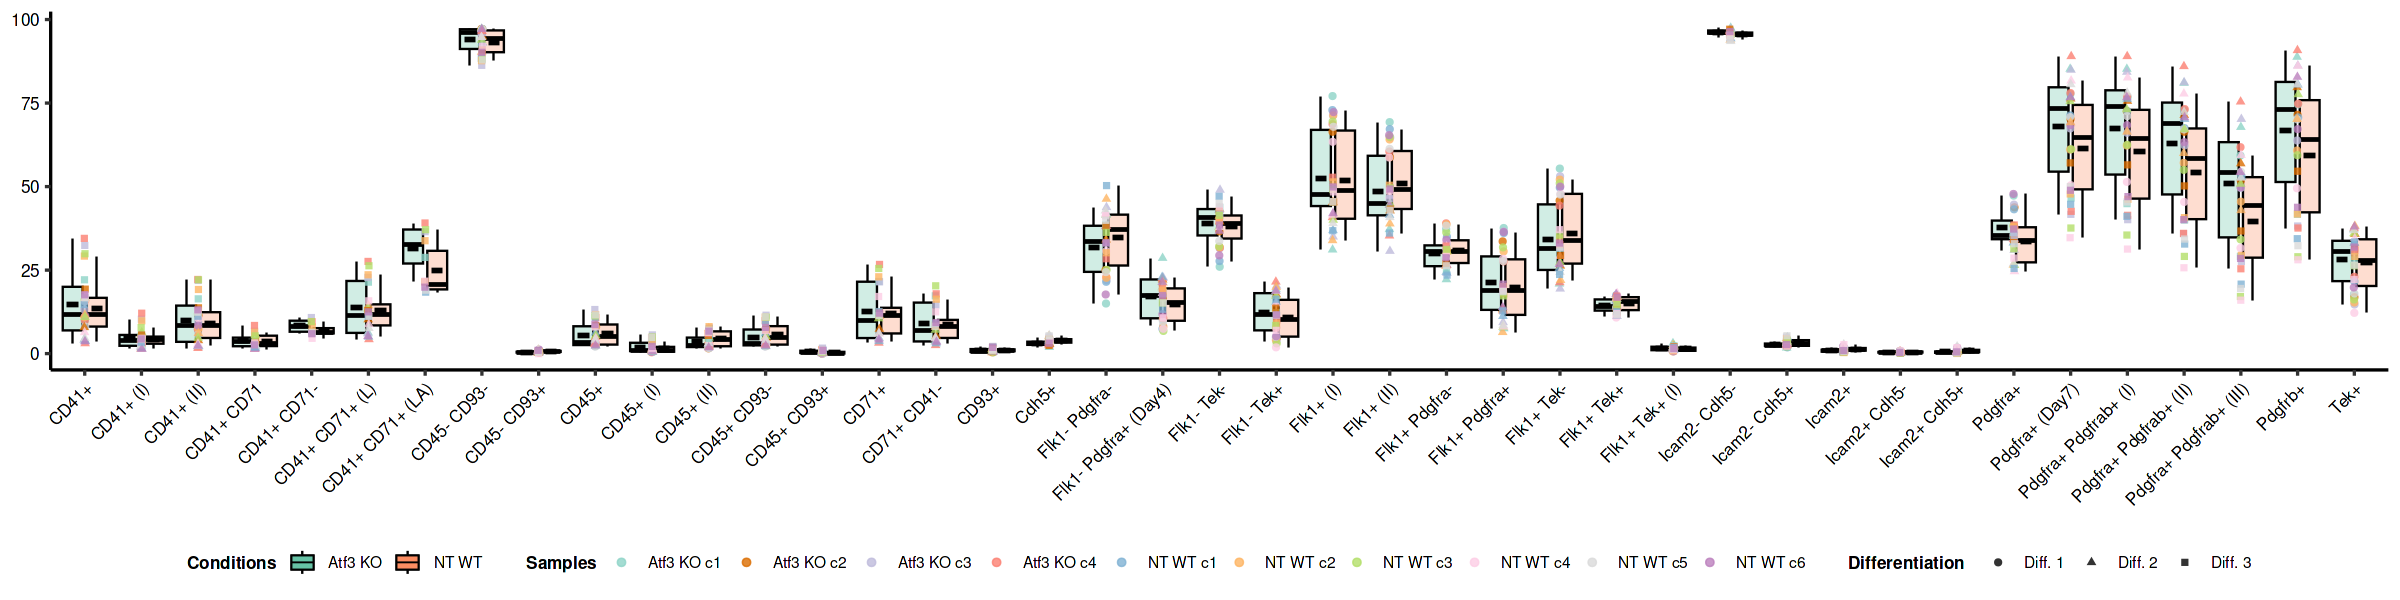

In [31]:

options(repr.plot.width = 20, repr.plot.height = 5)

ggplot(data_melted_mixed, aes(x = Measurement_hr, y = Value, fill = Conditions)) +
  geom_boxplot(position = position_dodge(width = 0.85), outlier.shape = NA, alpha = 0.3, width = 0.7, color = "black") +
 geom_jitter(
  aes(color = Samples3, shape = DifferentiationC, group = Measurement_hr),
  size = 1.7,
  alpha = 0.8,
  position = position_jitterdodge(jitter.width = 0.18, dodge.width = 0.85)
)+
  stat_summary(
    fun = mean, geom = "crossbar",
    position = position_dodge(width = 0.85),
    width = 0.4, color = "black", linewidth = 0.4, fatten = 3
  ) +
  # If you want to annotate, adjust the annotation data similarly
  scale_fill_brewer(palette = "Set2", name = "Conditions") +
  scale_color_manual(values = r3dcol$l10z) +
  labs(
    title = NULL,
    y = NULL,
    x = NULL
  ) +
  theme_classic(base_size = 14) +
  theme(
    axis.line = element_line(size = 0.7),
    axis.ticks = element_line(size = 0.7),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "black"),
    axis.text.y = element_text(size = 10, color = "black"),
    legend.position = "bottom",
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 9)
  ) +
  guides(
    fill = guide_legend(title = "Conditions", nrow = 1),
    color = guide_legend(title = "Samples", nrow = 1),
    shape = guide_legend(title = "Differentiation", nrow = 1)
  )


In [34]:
# Make sure Conditions is a factor and levels are correct:
data_melted_mixed$Conditions <- factor(data_melted_mixed$Conditions)

# Calculate y position above both boxes (use max value for either condition)
annotations_df <- data_melted_mixed %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = max(Value, na.rm = TRUE) * 1.14,
    Significance = first(Significance),    # Replace with your p-value/asterisk
    .groups = "drop"
  )

# Get numeric positions for the two conditions
cond_levels <- levels(data_melted_mixed$Conditions)
x1 <- cond_levels[1]
x2 <- cond_levels[2]


In [50]:
library(dplyr)

annotations_df <- data_melted_mixed %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = max(Value, na.rm = TRUE) + 10,
    Significance = first(Significance),    # Replace with your actual test result if needed
    .groups = "drop"
  ) %>%
  mutate(size = ifelse(Significance %in% c("n.s.", "ns", "NS", "N.S."), 3.5, 6))  # Adjust sizes as you like


In [53]:
annotations_df

Measurement_hr,y_position,Significance,size
<fct>,<dbl>,<fct>,<dbl>
CD41+,36.2250,n.s.,3.5
CD41+ (I),12.7050,n.s.,3.5
CD41+ (II),23.3100,n.s.,3.5
CD41+ CD71,8.8515,n.s.,3.5
CD41+ CD71-,11.3400,NA,6.0
CD41+ CD71+ (L),28.9800,n.s.,3.5
CD41+ CD71+ (LA),41.0550,NA,6.0
CD45- CD93-,102.0600,n.s.,3.5
CD45- CD93+,1.2705,NA,6.0


Warning message:
“Removed 83 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 83 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_text()`).”


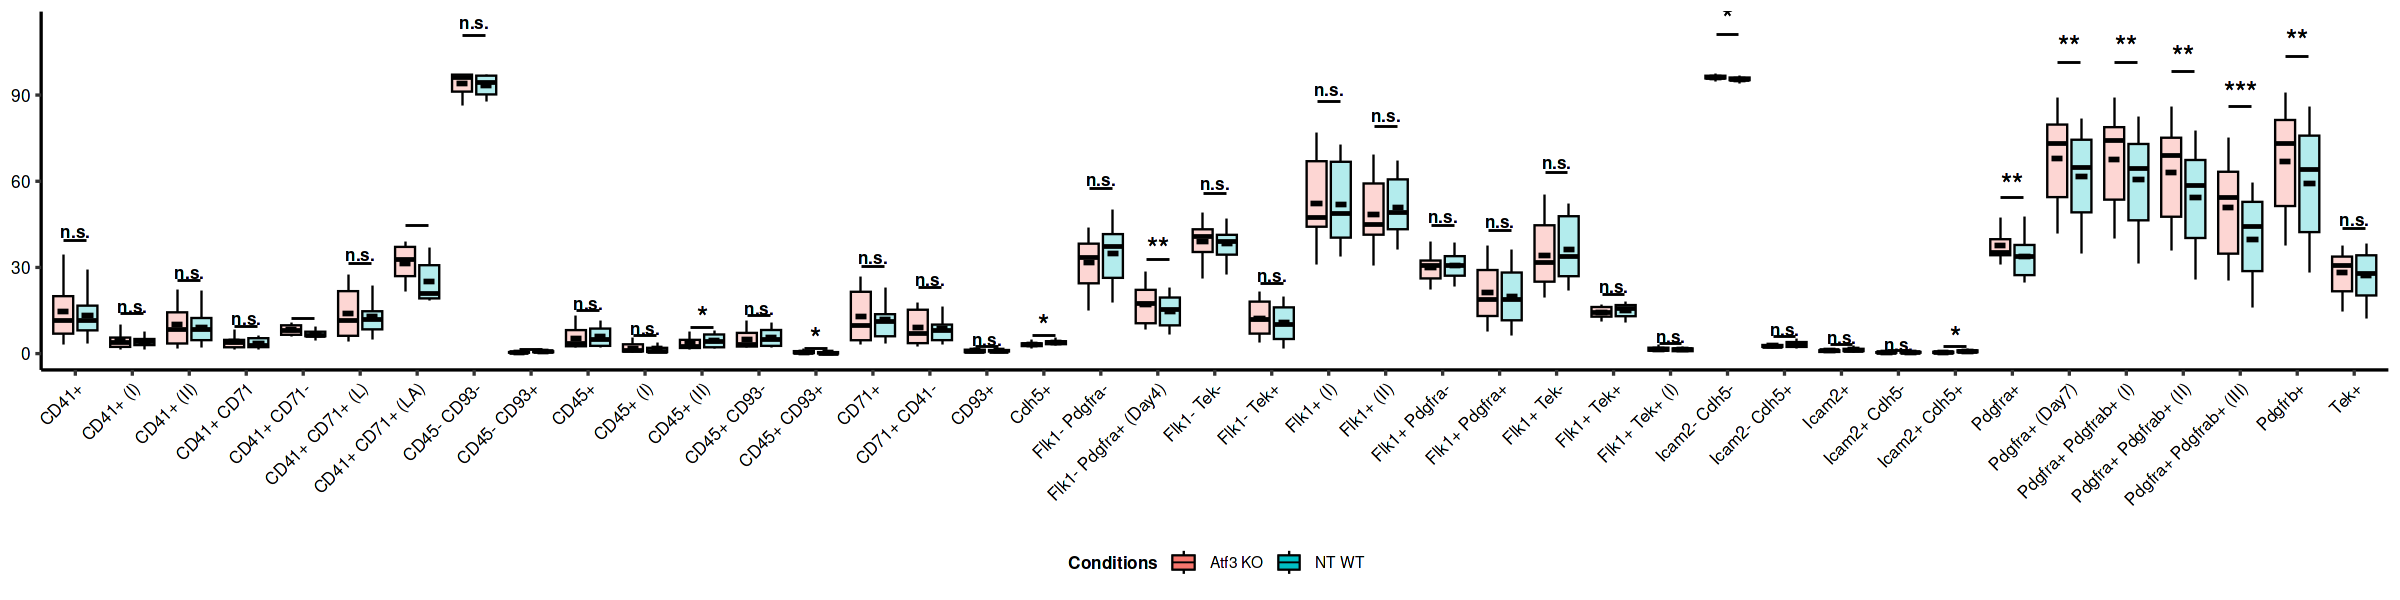

In [57]:
library(ggplot2)
options(repr.plot.width = 20, repr.plot.height = 5)

# Add custom size column
annotations_df <- data_melted_mixed %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = max(Value, na.rm = TRUE) * 1.14,
    Significance = first(Significance),
    .groups = "drop"
  ) %>%
  mutate(size = ifelse(Significance %in% c("n.s.", "ns", "NS", "N.S."), 3.5, 6))

ggplot(data_melted_mixed, aes(x = Measurement_hr, y = Value, fill = Conditions)) +
  geom_boxplot(
    position = position_dodge(width = 0.85),
    outlier.shape = NA,
    alpha = 0.3,
    width = 0.7,
    color = "black"
  ) +
  stat_summary(
    fun = mean, geom = "crossbar",
    position = position_dodge(width = 0.85),
    width = 0.4, color = "black", linewidth = 0.4, fatten = 3
  ) +
  geom_segment(
    data = annotations_df,
    aes(
      x = as.numeric(Measurement_hr) - 0.2,
      xend = as.numeric(Measurement_hr) + 0.2,
      y = y_position,
      yend = y_position
    ),
    inherit.aes = FALSE,
    color = "black",
    size = 0.6
  ) +
  geom_text(
    data = annotations_df,
    aes(
      x = as.numeric(Measurement_hr),
      y = y_position * 1.02,
      label = Significance,
      size = size
    ),
    vjust = 0,
    fontface = "bold",
    inherit.aes = FALSE
  ) +
  scale_size_identity() +
  labs(
    title = NULL,
    y = NULL,
    x = NULL
  ) +
  theme_classic(base_size = 14) +
  theme(
    axis.line = element_line(size = 0.7),
    axis.ticks = element_line(size = 0.7),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "black"),
    axis.text.y = element_text(size = 10, color = "black"),
    legend.position = "bottom",
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 9)
  ) +
  guides(
    fill = guide_legend(title = "Conditions", nrow = 1)
  )


In [61]:
library(dplyr)

data_plot <- data_melted_mixed %>%
  filter(!Measurement_hr %in% c())


In [72]:
annotations_df <- data_plot %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = (max(Value, na.rm = TRUE) * 1.04)+2,
    Significance = first(Significance),
    .groups = "drop"
  ) %>%
  mutate(size = ifelse(Significance %in% c("n.s.", "ns", "NS", "N.S."), 3.5, 6))

In [73]:
# Drop unused levels after filtering
data_plot <- data_plot %>% mutate(Measurement_hr = droplevels(factor(Measurement_hr)))
annotations_df <- annotations_df %>% mutate(Measurement_hr = factor(Measurement_hr, levels = levels(data_plot$Measurement_hr)))


In [77]:
annotations_df %>% filter(is.na(Significance) | Significance == "")

Measurement_hr,y_position,Significance,size
<fct>,<dbl>,<fct>,<dbl>
CD41+ CD71-,13.2320,NA,6
CD41+ CD71+ (LA),42.6640,NA,6
CD45- CD93+,3.2584,NA,6


In [82]:
data_plot <- data_melted_mixed %>%
  filter(!Measurement_hr %in% c("CD41+ CD71-", "CD41+ CD71+ (LA)","CD45- CD93+","CD45- CD93-", "Icam2- Cdh5-"))

In [86]:
annotations_df <- data_plot %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = (max(Value, na.rm = TRUE) * 1)+2,
    Significance = first(Significance),
    .groups = "drop"
  ) %>%
  mutate(size = ifelse(Significance %in% c("n.s.", "ns", "NS", "N.S."), 3.5, 6))

In [87]:
# Drop unused levels after filtering
data_plot <- data_plot %>% mutate(Measurement_hr = droplevels(factor(Measurement_hr)))
annotations_df <- annotations_df %>% mutate(Measurement_hr = factor(Measurement_hr, levels = levels(data_plot$Measurement_hr)))


Warning message:
“Removed 43 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 43 rows containing non-finite outside the scale range
(`stat_summary()`).”


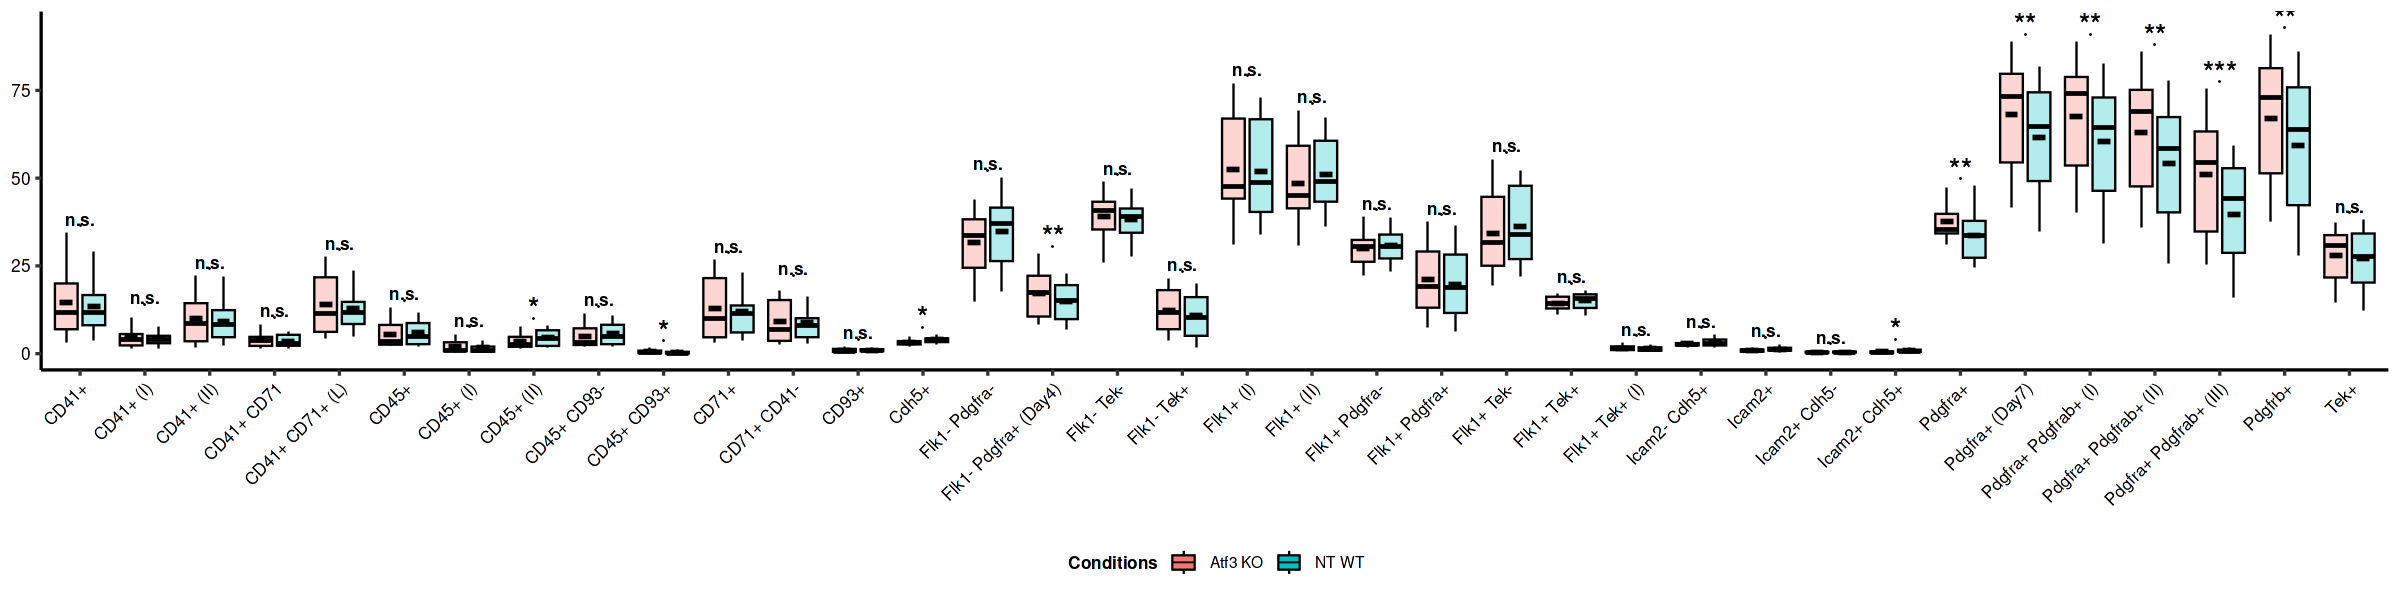

In [88]:
ggplot(data_plot, aes(x = Measurement_hr, y = Value, fill = Conditions)) +
  geom_boxplot(
    position = position_dodge(width = 0.85),
    outlier.shape = NA,
    alpha = 0.3,
    width = 0.7,
    color = "black"
  ) +
  stat_summary(
    fun = mean, geom = "crossbar",
    position = position_dodge(width = 0.85),
    width = 0.4, color = "black", linewidth = 0.4, fatten = 3
  ) +
  geom_segment(
    data = annotations_df,
    aes(
      x = Measurement_hr,               # Use factor, not as.numeric
      xend = Measurement_hr,
      y = y_position,
      yend = y_position
    ),
    inherit.aes = FALSE,
    color = "black",
    size = 0.6,
    lineend = "round",
    # If you want the segment to span both boxes, you need to dodge it.
    # For a simple bar above both boxes, use just x and xend at the same group.
  ) +
  geom_text(
    data = annotations_df,
    aes(
      x = Measurement_hr,                # Use factor, not as.numeric
      y = y_position * 1.0,
      label = Significance,
      size = size
    ),
    vjust = 0,
    fontface = "bold",
    inherit.aes = FALSE
  ) +
  scale_size_identity() +
  labs(
    title = NULL,
    y = NULL,
    x = NULL
  ) +
  theme_classic(base_size = 14) +
  theme(
    axis.line = element_line(size = 0.7),
    axis.ticks = element_line(size = 0.7),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "black"),
    axis.text.y = element_text(size = 10, color = "black"),
    legend.position = "bottom",
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 9)
  ) +
  guides(
    fill = guide_legend(title = "Conditions", nrow = 1)
  )


In [93]:
dim(annotations_df)

[1] 36  4

In [99]:
custom_order <- c(
  "Flk1+ (I)", "Pdgfra+", "Flk1+ Pdgfra-", "Flk1+ Pdgfra+", "Flk1- Pdgfra+ (Day4)",
  "Flk1+ Tek+", "Flk1+ Tek+ (I)", "Tek+",
  "Pdgfra+ (Day7)", "Pdgfrb+", "Pdgfra+ Pdgfrab+ (I)", "Pdgfra+ Pdgfrab+ (II)", "Pdgfra+ Pdgfrab+ (III)",
  "CD41+", "CD41+ (I)", "CD41+ (II)", "CD71+", "CD41+ CD71+ (L)",
  "CD45+", "CD45+ (I)", "CD45+ (II)",
  "CD93+",
  "Icam2+", "Cdh5+", "Icam2+ Cdh5+"
)


In [100]:
data_plot_ordered <- data_plot %>%
  filter(Measurement_hr %in% custom_order) %>%
  mutate(Measurement_hr = factor(Measurement_hr, levels = custom_order))


In [113]:
annotations_df <- data_plot_ordered %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = (max(Value, na.rm = TRUE) * 1)+1,
    Significance = first(Significance),
    .groups = "drop"
  ) %>%
  mutate(size = ifelse(Significance %in% c("n.s.", "ns", "NS", "N.S."), 4, 9))

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


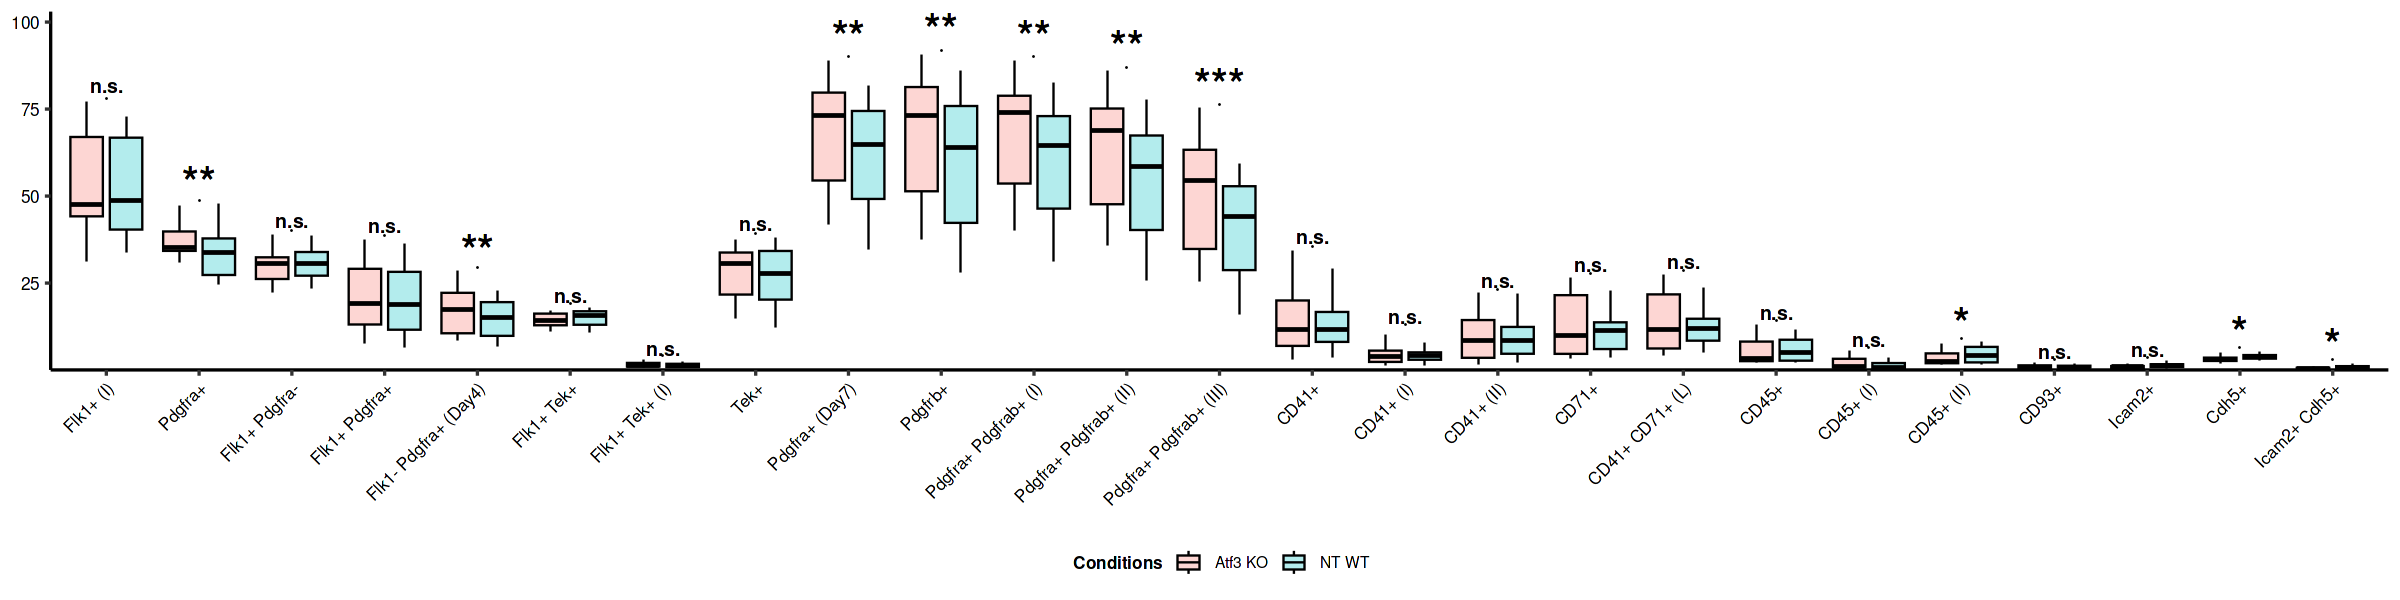

In [124]:
ggplot(data_plot_ordered, aes(x = Measurement_hr, y = Value, fill = Conditions)) +
  geom_boxplot(
    position = position_dodge(width = 0.85),
    outlier.shape = NA,
    alpha = 0.3,
    width = 0.7,
    color = "black"
  ) +
  geom_segment(
    data = annotations_df,
    aes(
      x = Measurement_hr,
      xend = Measurement_hr,
      y = y_position,
      yend = y_position
    ),
    inherit.aes = FALSE,
    color = "black",
    size = 0.6,
    lineend = "round"
  ) +
  geom_text(
    data = annotations_df,
    aes(
      x = Measurement_hr,
      y = y_position * 1.02,
      label = Significance,
      size = size
    ),
    vjust = 0,
    fontface = "bold",
    inherit.aes = FALSE
  ) +
  scale_size_identity() +
  scale_y_continuous(expand = expansion(mult = c(0, 0.10))) +   # <-- Only this line, no **
  labs(
    title = NULL,
    y = NULL,
    x = NULL
  ) +
  theme_classic(base_size = 14) +
  theme(
    axis.line = element_line(size = 0.7),
    axis.ticks = element_line(size = 0.7),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "black"),
    axis.text.y = element_text(size = 10, color = "black"),
    legend.position = "bottom",
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 9)
  ) +
  guides(
    fill = guide_legend(title = "Conditions", nrow = 1)
  )


Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


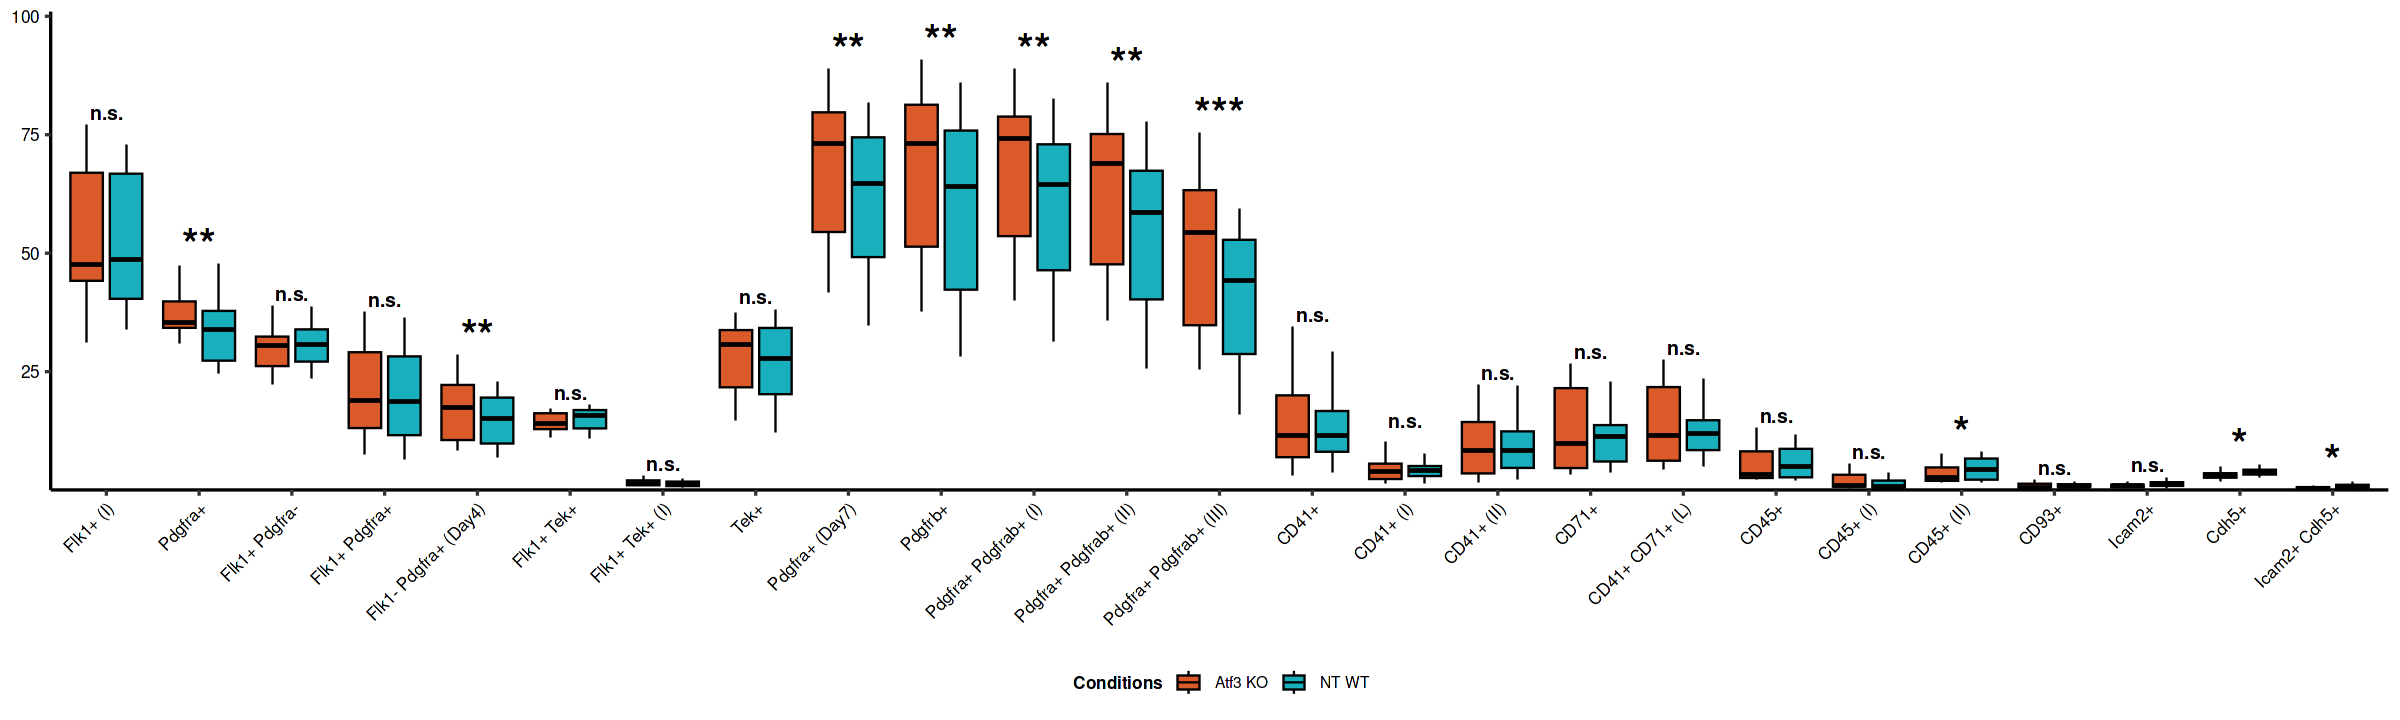

In [140]:

ggplot(data_plot_ordered, aes(x = Measurement_hr, y = Value, fill = Conditions)) +
  geom_boxplot(
    position = position_dodge(width = 0.85),
    outlier.shape = NA,
    alpha = 1,
    width = 0.7,
    color = "black"
  ) +
  geom_text(
    data = annotations_df,
    aes(
      x = Measurement_hr,
      y = y_position * 1.0,
      label = Significance,
      size = size
    ),
    vjust = 0,
    fontface = "bold",
    inherit.aes = FALSE
  ) +
  scale_size_identity() +
  scale_fill_manual(
    values = c(
      "Atf3 KO" = "#DA5A2A",        # Blue
      "NT WT" = "#1AAFBC"    # Gray
    )
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.10))) +
  labs(
    title = NULL,
    y = NULL,
    x = NULL
  ) +
  theme_classic(base_size = 14) +
  theme(
    axis.line = element_line(size = 0.7),
    axis.ticks = element_line(size = 0.7),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "black"),
    axis.text.y = element_text(size = 10, color = "black"),
    legend.position = "bottom",
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 9)
  ) +
  guides(
    fill = guide_legend(title = "Conditions", nrow = 1)
  )


Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


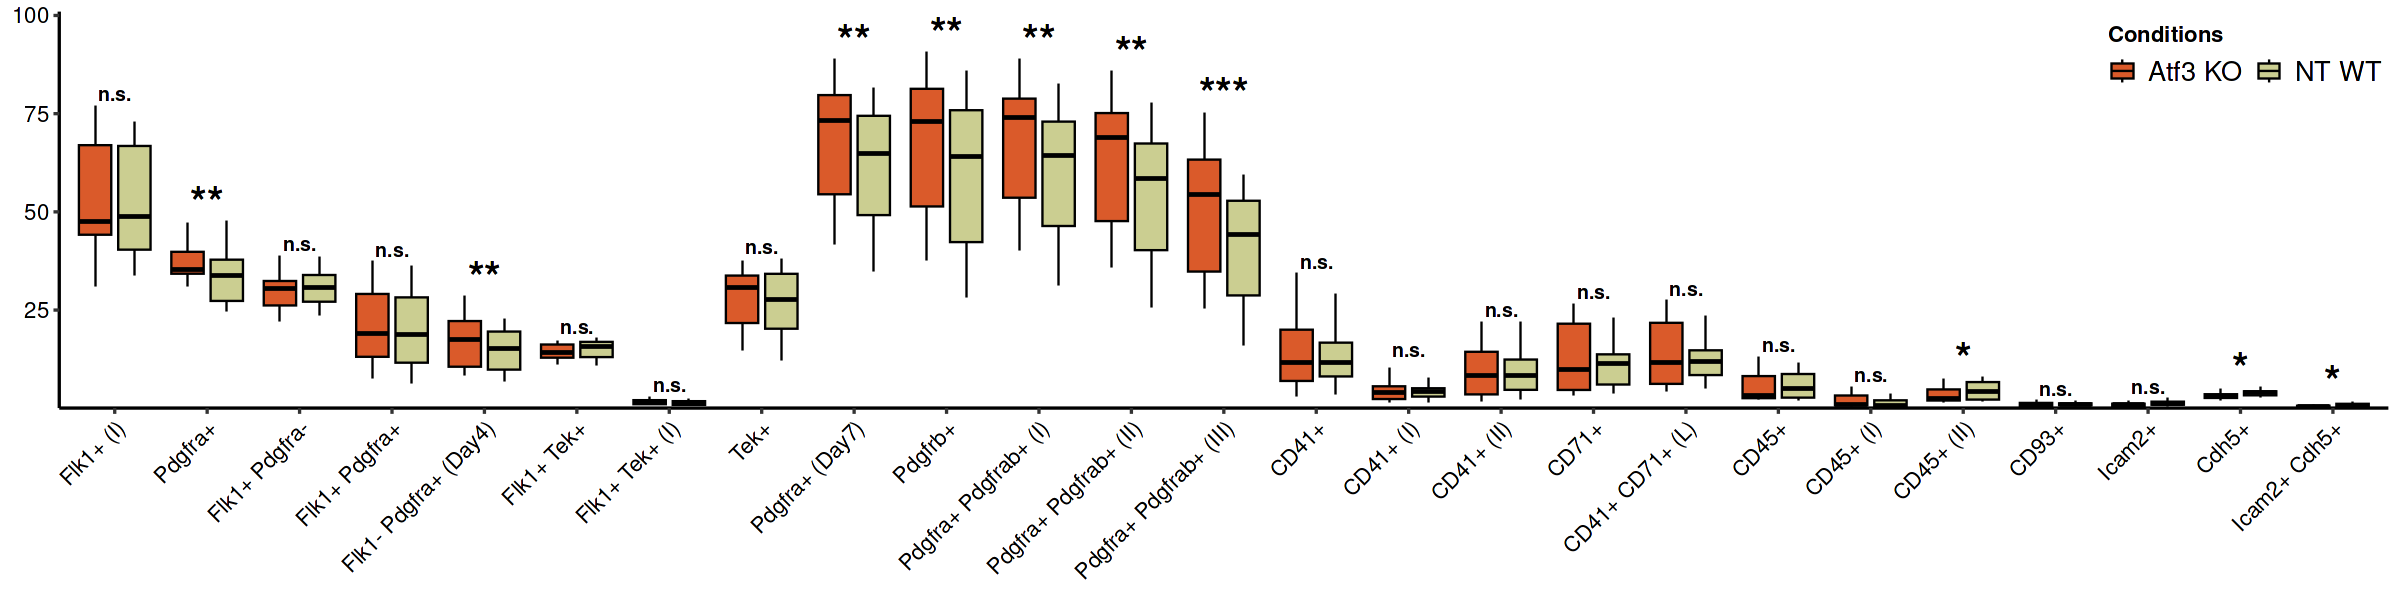

In [147]:
options(repr.plot.width = 20, repr.plot.height = 5)
ggplot(data_plot_ordered, aes(x = Measurement_hr, y = Value, fill = Conditions)) +
  geom_boxplot(
    position = position_dodge(width = 0.85),
    outlier.shape = NA,
    alpha = 1,
    width = 0.7,
    color = "black"
  ) +
  geom_text(
    data = annotations_df,
    aes(
      x = Measurement_hr,
      y = y_position * 1.0,
      label = Significance,
      size = size
    ),
    vjust = 0,
    fontface = "bold",
    inherit.aes = FALSE
  ) +
  scale_size_identity() +
  scale_fill_manual(
    values = c(
      "Atf3 KO" = "#DA5A2A",
      "NT WT" = "#CBCE91"
    )
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.10))) +
  labs(
    title = NULL,
    y = NULL,
    x = NULL
  ) +
  theme_classic(base_size = 14) +
  theme(
    axis.line = element_line(size = 0.7),
    axis.ticks = element_line(size = 0.7),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 13, color = "black"),
    axis.text.y = element_text(size = 13, color = "black"),
    legend.position = c(1, 1),                    # Top right INSIDE
    legend.justification = c(1, 1),               # Anchor to top right
    legend.title = element_text(size = 13, face = "bold"),
    legend.text = element_text(size = 16),
    legend.background = element_rect(fill = alpha('white', 0.7)), # Optional: legend background for readability
    legend.box.margin = margin(6, 6, 6, 6)        # Optional: add margin
  ) +
  guides(
    fill = guide_legend(title = "Conditions", nrow = 1)
  )


In [148]:
ggsave(filename = './atf3_facs_selected.pdf',plot = last_plot(),width = 20, height = 5,units = 'in',dpi = 300)

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


In [149]:
ggsave(filename = './atf3_facs_selected.png',plot = last_plot(),width = 20, height = 5,units = 'in',dpi = 300)

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


In [150]:
ggsave(filename = './atf3_facs_selected.svg',plot = last_plot(),width = 20, height = 5,units = 'in',dpi = 300)

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


In [154]:
save.image(file = './new_plot_env_atf3.RData', compress = FALSE)

In [155]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Debian GNU/Linux 12 (bookworm)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.21.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Amsterdam
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggsignif_0.6.4 tidyr_1.3.1    lmerTest_3.1-3 lme4_1.1-37    Matrix_1.7-3  
[6] reshape2_1.4.4 dplyr_1.1.4    ggplot2_3.5.2 

loaded via a namespace (and n